### Import des Bibliothéques
---

In [2]:
import pandas as pd
import numpy as np

from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import  OneHotEncoder, StandardScaler, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.cluster import KMeans, DBSCAN
from sklearn.metrics import  silhouette_score

import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 

import plotly.express as px

### Chargement des données
---

In [3]:
df = pd.read_csv("data/df_apr14_enriched.csv")
df_sample = df.sample(10000, random_state=42)
df_sample.head()

,Date/Time,Lat,Lon,Base,Hour,Time_of_day,Weekday,Date
77202,2014-04-09 10:21:00,40.8021,-73.9654,B02598,10,Morning,Wednesday,2014-04-09
558915,2014-04-14 04:55:00,40.6462,-73.7769,B02764,4,Night,Monday,2014-04-14
152635,2014-04-23 09:52:00,40.7747,-73.9603,B02598,9,Morning,Wednesday,2014-04-23
361259,2014-04-04 23:32:00,40.7150,-74.0157,B02682,23,Night,Friday,2014-04-04
60087,2014-04-05 19:57:00,40.7335,-74.0080,B02598,19,Evening,Saturday,2014-04-05


### 'Monday' Modèle KMeans - Clustering non supervisé - pour detecter les zones chaudes 
---

KMeans :

Cherche à former des clusters sphériques ou circulaires.

Tous les clusters ont tendance à avoir une forme “équilibrée” autour d’un centroïde.

Limitation : si tes données sont en forme irrégulière (ex. zones chaudes le long d’une avenue), KMeans peut mal représenter la densité réelle.

In [14]:
# Analyse sur Monday
df_monday=df_sample[df_sample['Weekday']=='Monday']

# Coordonnées
coords = df_monday[['Lat', 'Lon']]

# Déterminer le nombre optimal de clusters avec la méthode du coude pour Kmeans (WCSS)
wcss =  []
k = []
for i in range (2,15):
    kmeans = KMeans(n_clusters= i, random_state = 42, n_init = 'auto')
    kmeans.fit(coords)
    wcss.append(kmeans.inertia_)
    k.append(i)
    print("WCSS for K={} --> {}".format(i, wcss[-1]))

# Visualisation coude
fig= px.line( 
    x = k, 
    y = wcss,
    title="Méthode du coude (KMeans)"
    )   
fig.show()   

# Calcul du score de silhouette moy pour différents K (K (nombre de clusters) : le nombre de groupes que l’on veut identifier dans les données.)
sil = []
k = []
# Attention : il faut commencer à i = 2 car le score de silhouette ne peut pas être calculé avec moins de 2 clusters.
for i in range (2,11):
    kmeans = KMeans(n_clusters= i, random_state = 42, n_init = 'auto')
    kmeans.fit(coords)
    sil.append(silhouette_score(coords, kmeans.predict(coords)))
    k.append(i)
    print("Silhouette score for K={} is {}".format(i, sil[-1]))

# visualisation silhouette score
fig = px.bar(
    x = k,
    y = sil,
    title="Score de silhouette moyen"
    )
fig.show()

# Application du modèle KMeans avec K optimal
optimal_k=6
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
kmeans.fit(coords)

# création df avec col 'Cluster_kmeans' - Ajout des labels KMeans au dataframe pour analyse
df_monday['Cluster_kmeans']=kmeans.predict(coords)
#df_sample['Cluster_kmeans'] = df_sample['Cluster_kmeans'].astype(str)
display(df_monday.head())

# Visualiser les zones chaudes sur carte
fig = px.scatter_mapbox(
    df_monday,
    lat="Lat",
    lon="Lon",
    color="Cluster_kmeans",
    height = 500,
    zoom=9,
    title=f"Zones chaudes Uber Monday - {optimal_k} clusters (KMeans)",
    mapbox_style="carto-positron"
)
fig.show()


WCSS for K=2 --> 3.015750656834106
WCSS for K=3 --> 2.3061267668537373
WCSS for K=4 --> 1.6059030504847382
WCSS for K=5 --> 1.3975309649034977
WCSS for K=6 --> 0.9941707924129988
WCSS for K=7 --> 0.7754711947980034
WCSS for K=8 --> 0.596633604653137
WCSS for K=9 --> 0.5525974302567157
WCSS for K=10 --> 0.44861093463194357
WCSS for K=11 --> 0.37888922117970675
WCSS for K=12 --> 0.3418027218486326
WCSS for K=13 --> 0.3328552537930774
WCSS for K=14 --> 0.29392493238955153


c:\Users\natha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

c:\Users\natha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

c:\Users\natha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

c:\Users\natha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

c:\Users\natha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

c:\Users\natha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

c:\Users\natha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

c:\Users\natha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than 

Silhouette score for K=2 is 0.7681262249860578
Silhouette score for K=3 is 0.7659181510418038
Silhouette score for K=4 is 0.4172891520925228
Silhouette score for K=5 is 0.42054387955299777
Silhouette score for K=6 is 0.45996432244536456


c:\Users\natha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

c:\Users\natha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

c:\Users\natha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.



Silhouette score for K=7 is 0.485385043203905
Silhouette score for K=8 is 0.487057380749055
Silhouette score for K=9 is 0.4830092587077223
Silhouette score for K=10 is 0.49598955258670097


c:\Users\natha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=4.

C:\Users\natha\AppData\Local\Temp\ipykernel_26484\419840683.py:50: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date/Time,Lat,Lon,Base,Hour,Time_of_day,Weekday,Date,Cluster_kmeans
558915,2014-04-14 04:55:00,40.6462,-73.7769,B02764,4,Night,Monday,2014-04-14,1
313984,2014-04-28 08:30:00,40.7747,-73.9900,B02617,8,Morning,Monday,2014-04-28,3
382456,2014-04-07 19:14:00,40.7558,-73.9834,B02682,19,Evening,Monday,2014-04-07,3
380630,2014-04-07 17:18:00,40.7817,-73.9810,B02682,17,Evening,Monday,2014-04-07,3
529203,2014-04-28 11:19:00,40.7470,-73.9927,B02682,11,Morning,Monday,2014-04-28,3


### 'Monday' Modèle DBSCAN – Clustering non supervisé pour détecter les zones chaudes
---

DBSCAN :

Ne fait aucune hypothèse sur la forme des clusters.

Capte des clusters de densité, donc ils peuvent être allongés, irréguliers ou non circulaires.

Les points isolés sont automatiquement considérés comme bruit (-1).

In [5]:
# DBSCAN
dbscan = DBSCAN(eps=0.005, min_samples=5)
df_monday['Cluster_dbscan'] = dbscan.fit_predict(df_monday[['Lat','Lon']])

np.unique(dbscan.labels_)

display(df_monday.head())

fig = px.scatter_mapbox(
        df_monday[df_monday.Cluster_dbscan != -1],
        lat="Lat",
        lon="Lon",
        color="Cluster_dbscan",
        height = 500,
        zoom=9,
        title="Clusters DBScan Monday",
        mapbox_style="carto-positron"
)
fig.show()


C:\Users\natha\AppData\Local\Temp\ipykernel_26484\3408230945.py:3: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,Date/Time,Lat,Lon,Base,Hour,Time_of_day,Weekday,Date,Cluster_kmeans,Cluster_dbscan
558915,2014-04-14 04:55:00,40.6462,-73.7769,B02764,4,Night,Monday,2014-04-14,1,0
313984,2014-04-28 08:30:00,40.7747,-73.9900,B02617,8,Morning,Monday,2014-04-28,3,1
382456,2014-04-07 19:14:00,40.7558,-73.9834,B02682,19,Evening,Monday,2014-04-07,3,1
380630,2014-04-07 17:18:00,40.7817,-73.9810,B02682,17,Evening,Monday,2014-04-07,3,1
529203,2014-04-28 11:19:00,40.7470,-73.9927,B02682,11,Morning,Monday,2014-04-28,3,1


Le lundi, les points en violet foncé représentent le cluster le plus dense (Cluster_dbscan = 0).

Ce cluster couvre une grande partie de Manhattan → zone très active, donc très chaude pour les chauffeurs Uber.
Les 3 aéroports sont également représentés bien distinctement sur la carte.


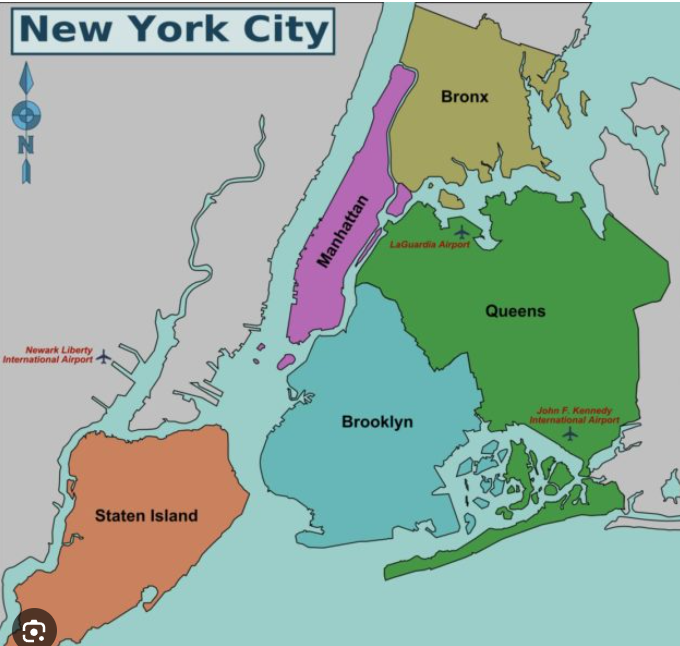

###  'Time of day' Modèle KMeans - Clustering non supervisé - pour detecter les zones chaudes 
---

In [15]:
# Analyse par moment de la journée
times = df_sample['Time_of_day'].unique()

for time in times:
    df_time = df_sample[df_sample['Time_of_day'] == time].copy()
    
    coords = df_time[['Lat', 'Lon']]
    
    # Clustering KMeans (ex : 5 clusters)
    kmeans = KMeans(n_clusters=4, random_state=42)
    df_time['Cluster_kmeans'] = kmeans.fit_predict(coords)
    
    # Visualisation Carte par jours
    fig = px.scatter_mapbox(
        df_time,  
        lat="Lat",
        lon="Lon",
        color="Cluster_kmeans",
        height=500,
        zoom=10,
        title=f"Zones chaudes le {time} (KMeans)",
        mapbox_style="carto-positron"
    )
    fig.show()


c:\Users\natha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=10.



c:\Users\natha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=9.



c:\Users\natha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=12.



c:\Users\natha\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning:

KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=11.



### 'Time of day' Modèle DBSCAN – Clustering non supervisé pour détecter les zones chaudes
---

In [16]:
# Zones chaudes moment de la journée
for time in times:
    df_time = df_sample[df_sample['Time_of_day'] == time].copy()
    
    coords = df_time[['Lat', 'Lon']]
    
    # Clustering DBSCAN
    dbscan = DBSCAN(eps=0.01, min_samples=10)  # eps en degrés (~1 km)
    df_time['Cluster_dbscan'] = dbscan.fit_predict(coords)
    
    # Carte
    fig = px.scatter_mapbox(
        df_time[df_time['Cluster_dbscan'] != -1],  # ignorer les outliers
        lat="Lat",
        lon="Lon",
        color="Cluster_dbscan",
        height=500,
        zoom=10,
        title=f"Zones chaudes le {time} (DBSCAN)",
        mapbox_style="carto-positron"
    )
    fig.show()



In [17]:
# Visualisation densité par moment de la journéee en un seul graph
# Copy DataFrame 
df_densite = df_sample.copy()

# Ajouter la colonne Cluster DBSCAN
coords = df_densite[['Lat', 'Lon']]
dbscan = DBSCAN(eps=0.01, min_samples=10)
df_densite['Cluster_dbscan'] = dbscan.fit_predict(coords)

# On enlève les outliers (-1)
df_clusters = df_densite[df_densite['Cluster_dbscan'] != -1]

# Compter le nombre de points par jour
df_time = df_clusters.groupby('Time_of_day').size().reset_index(name='Nb_points')
print(df_time)

# Visu en barres
fig = px.bar(
  df_time.sort_values('Nb_points', ascending=False),  # optionnel : trier par nb de points
    x='Time_of_day',
    y='Nb_points',
    title='Zones chaudes par moment de la journée (DBSCAN)',
    labels={'Time_of_day':'Moment de la journée', 'Nb_points':'Nombre de points clusterisés'},
    color='Nb_points',
    text='Nb_points'
)
fig.show()

  Time_of_day  Nb_points
0   Afternoon       2590
1     Evening       2800
2     Morning       2275
3       Night       2051


La soirée est le moment de la journée le plus dense, suivi de l'aprés_midi. La nuit étant le moment de la journée le moins dense.